In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import itertools
import cv2
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# bgr_image = cv2.imread('notredame16/02.jpg')
# gray_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)

In [3]:
#cv2.imshow('image',image)

In [4]:
#scan_line = gray_image[len(gray_image)*2/3,:]


In [29]:
from scipy import ndimage

def symmetry_factor(scan_line, index, max_width):
    left = scan_line[index-max_width:index].astype(float)
    right = np.flipud(scan_line[index:index+max_width]).astype(float)
    #left = np.ones(len(left))*255
    #right = np.zeros(len(right))
    diff = np.abs(left - right)
    #diff = np.abs(left - right)
    
    
    kernel = cv2.getGaussianKernel(len(diff)*2,0)[len(diff):]*2
    
    return diff.dot(kernel) #+255- np.std(left)+255 - np.std(right)#np.average(diff) 

def scan_whole_line(whole_image, height_index=400, max_width = 100):
    scan_line = whole_image[height_index,:]
    #print list(scan_line)
    X = range(max_width,len(scan_line)-max_width)
    
    Y=np.array([symmetry_factor(scan_line,index,max_width) for index in X])
    #Y[Y>32] = 255
    return np.squeeze(Y)
    #res = np.ones(len(scan_line))[:np.newaxis]*128
    #res[max_width:len(scan_line)-max_width] = np.squeeze(Y)
    #return res
    #Y= res
    #Y = ndimage.correlate1d(Y,np.ones(2))

    #c = np.ones(50)
    #c = list(c)+[-len(c)]+list(-c)
    #Y1 = ndimage.correlate1d(Y, c)

    #Y2 = ndimage.correlate1d(Y1, [-1,0,1])

    #indices = np.indices(Y.shape) + max_width

    #Y1_zero =np.abs(Y1) <1
    #Y2_positive = Y2>0
    
    
    #print np.sum(Y1_zero)   
    #print np.sum(Y2_positive)


    #Yminima = np.logical_and(Y1_zero,Y2_positive)


    #Y2 - np.abs(Y1)
    #print np.sum(Yminima)
    
    #print Yminima
    #best_indexes = indices[0][Y<50]

    #print best_indexes.shape
    
    #     results = []
    #     for index in best_indexes:
    #         #if index < max_width or index> len(image)-max_width:
    #         #    continue
    #         results.append((int(index),int(height_index)))
    #         break
    #         drawing = bgr_image.copy()
    #         cv2.line(drawing,(0,height_index),(len(scan_line),height_index),(0,255,255))
    #         cv2.line(drawing,(index,0),(index,len(image)),(0,0,255))
    #         cv2.line(drawing,(index-max_width,0),(index-max_width,len(image)),(255,0,0))
    #         cv2.line(drawing,(index+max_width,0),(index+max_width,len(image)),(255,0,0))
    #         cv2.imshow("jej",drawing)
    #         c = cv2.waitKey(0)
    #         if 'q' == chr(c & 255):
    #             break
    #     return Y

    #     plt.figure(figsize=(20,20))
    #     d = drawing.copy()
    #     cv2.line(d,(0,height_index),(len(scan_line),height_index),(0,255,255))
    #     plt.subplot(2,1,1),plt.imshow(d)
    #     plt.subplot(2,1,2),plt.axis([0,700,0,np.log(2000000)]),  plt.scatter(X,np.log(Y))
    #     plt.show()

    # plt.show()
    # plt.scatter(X,Y1)
    # plt.show()
    # plt.scatter(X,Y2)
    # plt.show()
    #plt.scatter(best_indexes,np.ones(best_indexes.shape))
    #plt.show()
    #     return results

    #print best_indexes

In [30]:
def unique_rows(a,orderBy):
    order = np.lexsort(orderBy.T)
    a = a[order]
    orderBy = orderBy[order]
    diff = np.diff(orderBy, axis=0)
    ui = np.ones(len(orderBy), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return a[ui]

def process_features(gray_image,width,features,bgr_image):
    assert width in [np.power(2,i) for i in xrange(0,10)]
    feature_vectors = []
    #feature_map = {}
    for feature_y, feature_x in features:
        scan_line = gray_image[feature_y,:]
        index = feature_x
        
        left = scan_line[index-width:index].astype(float)
        right = np.flipud(scan_line[index:index+width]).astype(float)
        
        avg_line = (left + right)/2
        avg_value = np.average(avg_line)
        
        feature_vector = avg_line<avg_value
        
        #if np.sum(np.abs(feature_vector))==0:
        #    continue
        
        feature_vector = sp.ndimage.zoom(feature_vector, 128/float(width), order=0).astype(int)
        
        xy = np.array([feature_x,feature_y])
        #print feature_vector.shape, xy.shape
        feature_vector = np.hstack((feature_vector,xy))
        #feature_vector =np.array(list(feature_vector)+[avg_value>128])
        
        #feature_map_instance = [(feature_y,feature_x),bgr_image]
        #if str(feature_vector) in feature_map:
        #   feature_map[str(feature_vector)].append(feature_map_instance)
        #else:
        #    feature_map[str(feature_vector)] = [feature_map_instance]
        
        feature_vectors.append(feature_vector)
    return np.array(feature_vectors).astype(int)#, feature_map
#print process_features(gray_image,16,[[50,100],[60,20]],gray_image)


In [31]:

import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
# 

#processed_image = gray_image.copy()
#processed_image = cv2.GaussianBlur(processed_image,sigmaX=0,ksize=(5,5)) 
#processed_image = cv2.Laplacian(processed_image,cv2.CV_64F,ksize=5)
#plt.imshow(processed_image,cmap = 'gray')
#drawing = bgr_image.copy()

#print processed_image[20:40,20:40]
def create_symmetry_map(image,width,verbose=False):
    img = np.zeros(image.shape[1] - width*2)
    for num in xrange(1,image.shape[0]):
        results = scan_whole_line(image,num,width)
        img = np.vstack((img,results))
    img = img.astype(np.float32)
    kernel_size= 11
    if verbose:
        plt.imshow(img,cmap='gray')
    img = cv2.GaussianBlur(img,sigmaX=0,ksize=(kernel_size,1)) 
    img = cv2.Sobel(img,cv2.CV_32F,2,0,ksize=kernel_size)
    padding = np.zeros((img.shape[0],width))
    
    if verbose:
        plt.figure(figsize=(20,20))
        plt.show()
        plt.imshow(img,cmap='gray')

        plt.figure(figsize=(20,20))
        plt.show()
    return np.hstack((padding,img,padding))#[:,w:img.shape[1]-w]


def proceess_image(bgr_image,w,verbose = True):
   
    gray_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)
    gray_image = cv2.GaussianBlur(gray_image,sigmaX=0,ksize=(3,3)) 
    
    if bgr_image.shape[1] -2*w<= 0:
        return
    processed_map_horizontal = create_symmetry_map(gray_image,w,verbose)
        
    #processed_map_vertical = create_symmetry_map(processed_image.transpose(),w,verbose).T
    
    processed_map_horizontal[processed_map_horizontal<0]=0
    #processed_map_vertical[processed_map_vertical<0] = 0
    processed_map = processed_map_horizontal#*processed_map_vertical
    #print processed_map.shape
    #processed_map = 0-processed_map
    #print processed_map.shape
    #mapa = cv2.convertScaleAbs(img)
    #img= -img
    
    #processed_map[processed_map<0] = 0
    
    #print np.max(processed_map)
    #print np.min(processed_map)
    processed_map = processed_map.astype(np.float32)
    processed_map[processed_map<np.max(processed_map)*0.5] = 0
    
    neighborhood_size = 5
    threshold = 0

    data = processed_map

    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0

    labeled, num_objects = ndimage.label(maxima)
    xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))
    #_,processed_map =cv2.threshold(processed_map,np.max(processed_map)*0.5,1,cv2.THRESH_BINARY)
    if verbose:
        plt.figure(figsize=(20,20))
        #cv2.imshow("s",processed_map)
        #plt.imshow(processed_map_horizontal,cmap='gray')
        #plt.show()
        #plt.figure(figsize=(20,20))
        #plt.imshow(processed_map_vertical,cmap='gray')
        #plt.show()
        plt.figure(figsize=(15,15.0/(640.0/480.0)))
        imgg = bgr_image.copy()
        imgg = cv2.resize(imgg,(0,0),fx=2,fy=2)
        for l in xy:
            cv2.circle(imgg,(int(l[1]*2),int(l[0]*2)),w*2,(255,0,0))


        plt.imshow(imgg)

        plt.axis([0,imgg.shape[1],imgg.shape[0],0])
        #plt.scatter(xy[:, 1], xy[:, 0], '')
        #plt.scatter(xy[:, 1], xy[:, 0],s =w*w*4*4,facecolors='none', edgecolors='r')
        plt.scatter(xy[:, 1]*2, xy[:, 0]*2,marker='+',c='r')
        plt.show()
        print "Feature count: "+str(len(xy))

        plt.imshow(processed_map,cmap='gray')    
        plt.show()
    
    return process_features(gray_image,w,xy,bgr_image)

        #for r in results:
        #    cv2.circle(drawing,r,int(w),(255,255,255))
        #cv2.imshow("stream",drawing)

In [32]:
def preprocess_image(image, max_width=640/2, max_height = 480/2):
    factor = 1
    if image.shape[0]>max_height:
        factor = max_height/float(image.shape[0])
    if image.shape[1]>max_width:
        f2 = max_width/float(image.shape[1])
        factor = f2 if f2 <factor else factor
    return cv2.resize(image,(0,0),fx=factor,fy=factor) if factor <1 else image

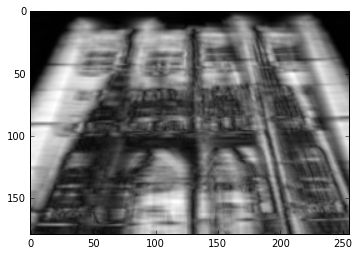

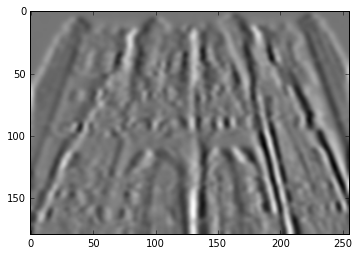

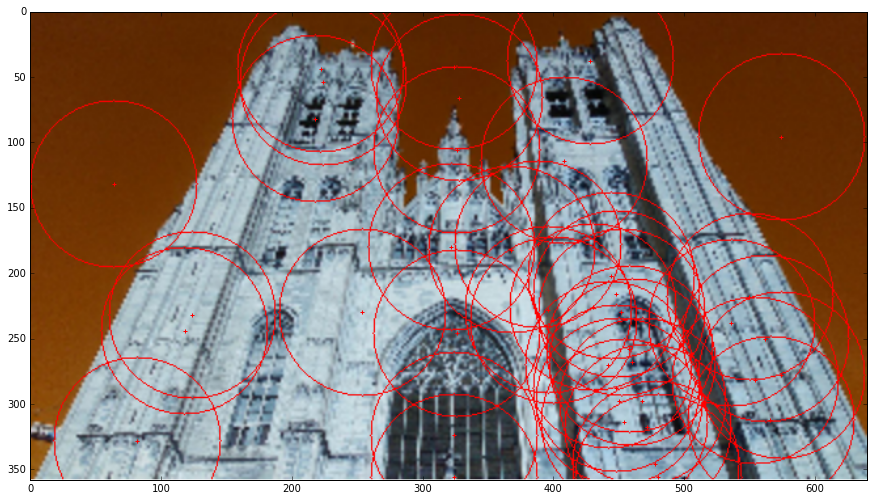

Feature count: 42


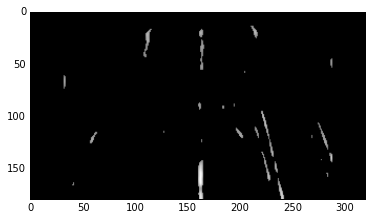

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0, 214,  19],
       [  0,   0,   0, ...,   1, 162,  21],
       [  1,   1,   1, ...,   0, 111,  22],
       ..., 
       [  1,   1,   1, ...,   0, 239, 173],
       [  0,   0,   0, ...,   0, 162, 178],
       [  1,   1,   1, ...,   0, 240, 178]])

In [33]:
#bgr_image = cv2.imread('notredame16/01.jpg')
#proceess_image(bgr_image,100)
#bgr_image = cv2.imread('notredame16/02.jpg')
#proceess_image(bgr_image,100)
bgr_image = cv2.imread('notredame16/ne_notredame.jpg')
bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,32)

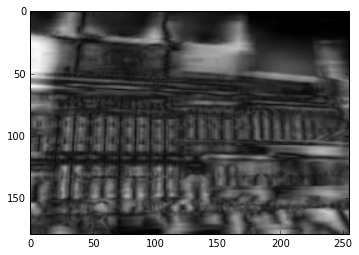

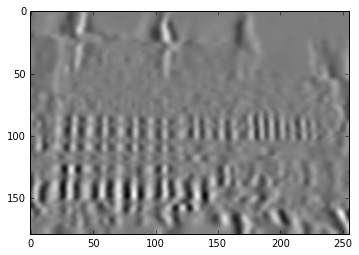

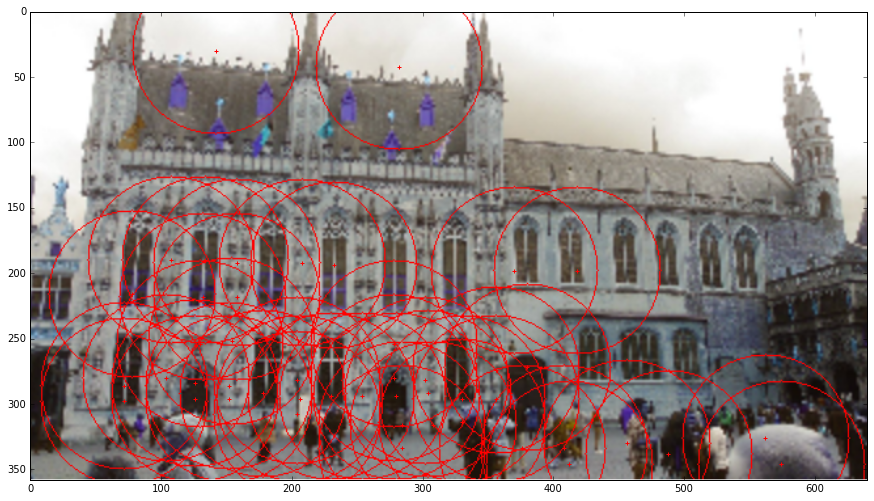

Feature count: 47


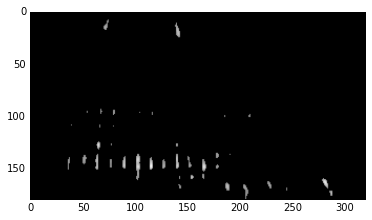

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0,  71,  15],
       [  1,   1,   1, ...,   0, 141,  21],
       [  0,   0,   0, ...,   0,  54,  95],
       ..., 
       [  0,   0,   0, ...,   1, 244, 169],
       [  1,   1,   1, ...,   0, 206, 173],
       [  1,   1,   1, ...,   1, 287, 173]])

In [34]:
#bgr_image = cv2.imread('notredame16/01.jpg')
bgr_image = cv2.imread('angle4.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,32)

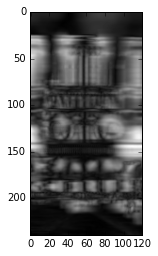

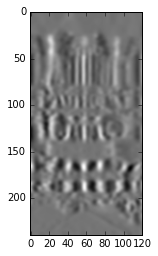

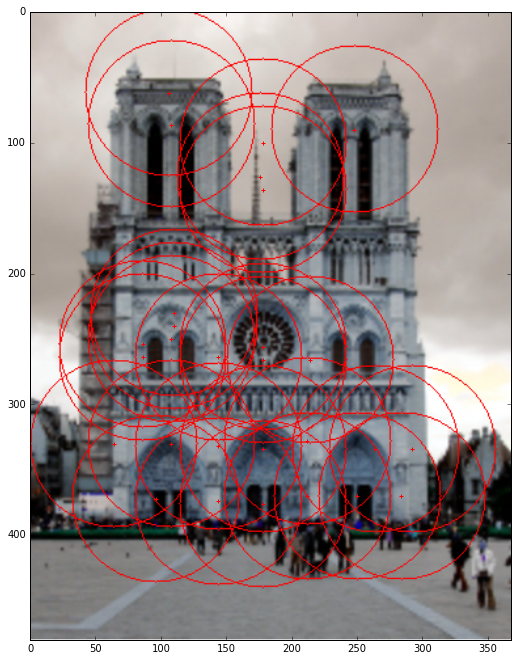

Feature count: 28


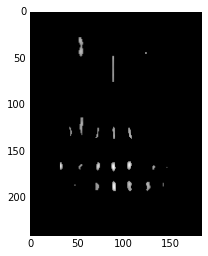

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  0,   0,   0, ...,   1,  53,  31],
       [  0,   0,   0, ...,   0,  54,  43],
       [  0,   0,   0, ...,   1, 124,  45],
       ..., 
       [  1,   1,   1, ...,   1,  48, 186],
       [  0,   0,   0, ...,   0,  72, 187],
       [  1,   1,   1, ...,   1,  89, 188]])

In [35]:
bgr_image = cv2.imread('notredame16/02.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,32)

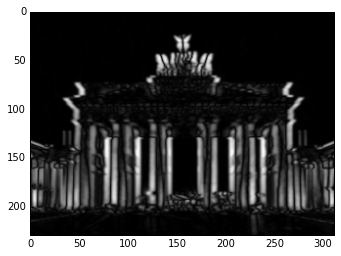

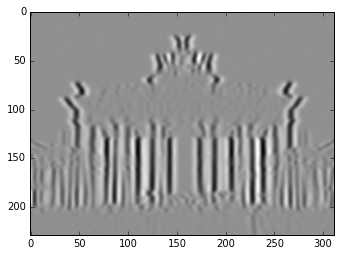

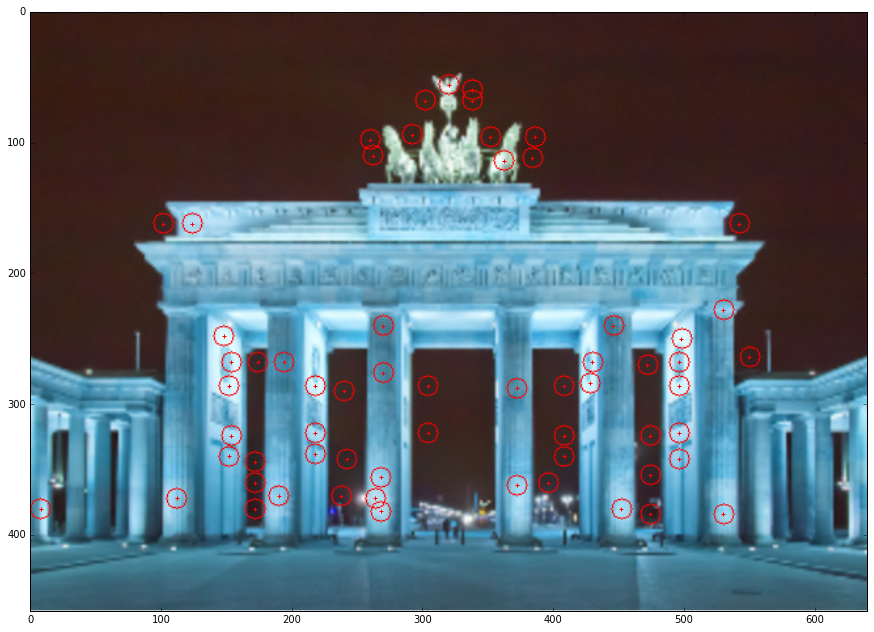

Feature count: 62


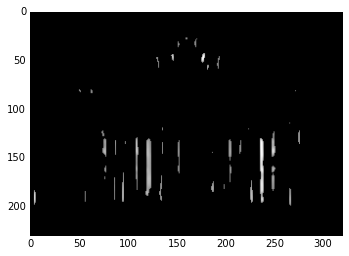

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   1, 160,  28],
       [  0,   0,   0, ...,   1, 169,  30],
       [  0,   0,   0, ...,   1, 151,  34],
       ..., 
       [  1,   1,   1, ...,   0, 134, 191],
       [  0,   0,   0, ...,   1, 237, 192],
       [  1,   1,   1, ...,   0, 265, 192]])

In [36]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,4)

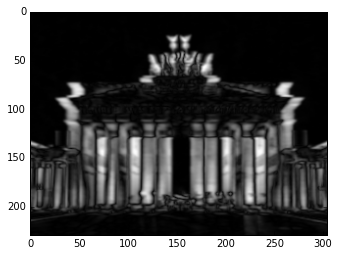

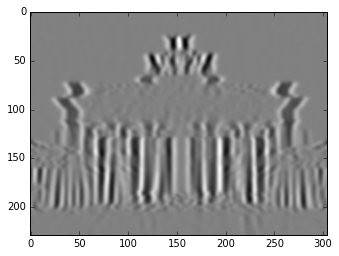

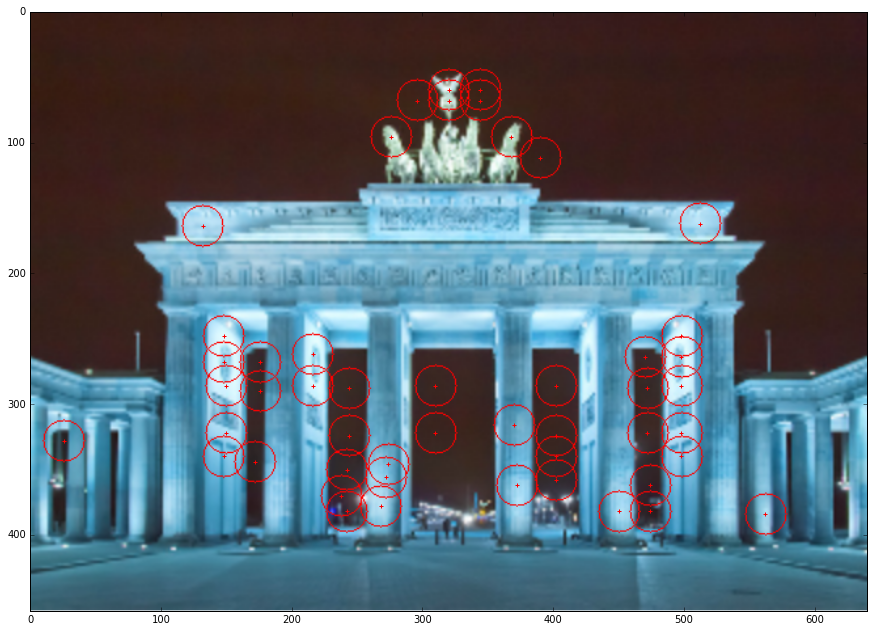

Feature count: 49


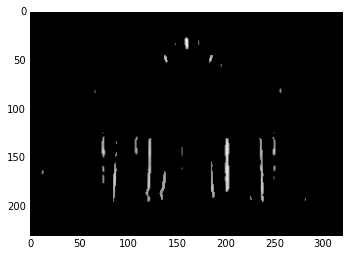

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0, 160,  30],
       [  0,   0,   0, ...,   1, 172,  30],
       [  0,   0,   0, ...,   0, 148,  34],
       ..., 
       [  1,   1,   1, ...,   0, 225, 191],
       [  0,   0,   0, ...,   1, 237, 191],
       [  1,   1,   1, ...,   0, 281, 192]])

In [37]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,8)

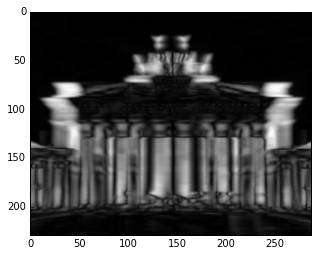

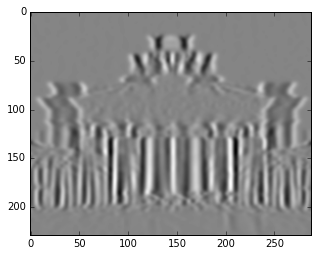

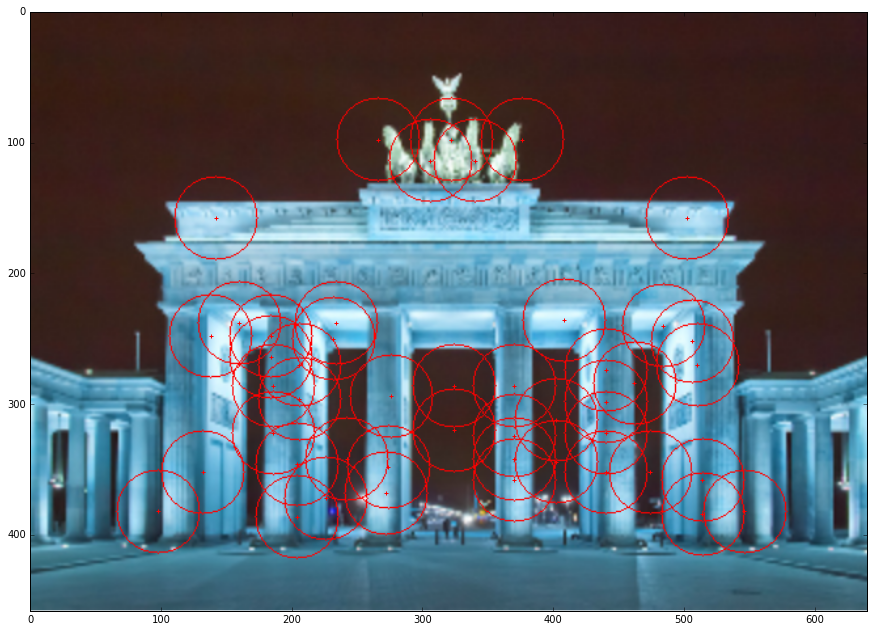

Feature count: 47


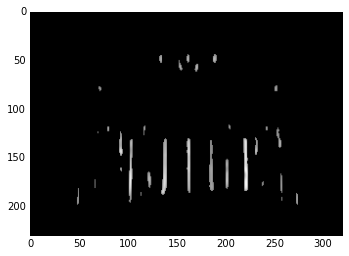

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   1, 133,  49],
       [  1,   1,   1, ...,   0, 161,  49],
       [  1,   1,   1, ...,   1, 188,  49],
       ..., 
       [  1,   1,   1, ...,   1, 273, 191],
       [  1,   1,   1, ...,   1, 257, 192],
       [  1,   1,   1, ...,   1, 102, 193]])

In [38]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,16)

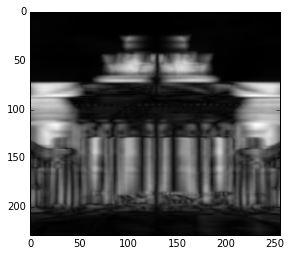

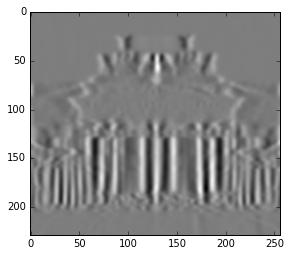

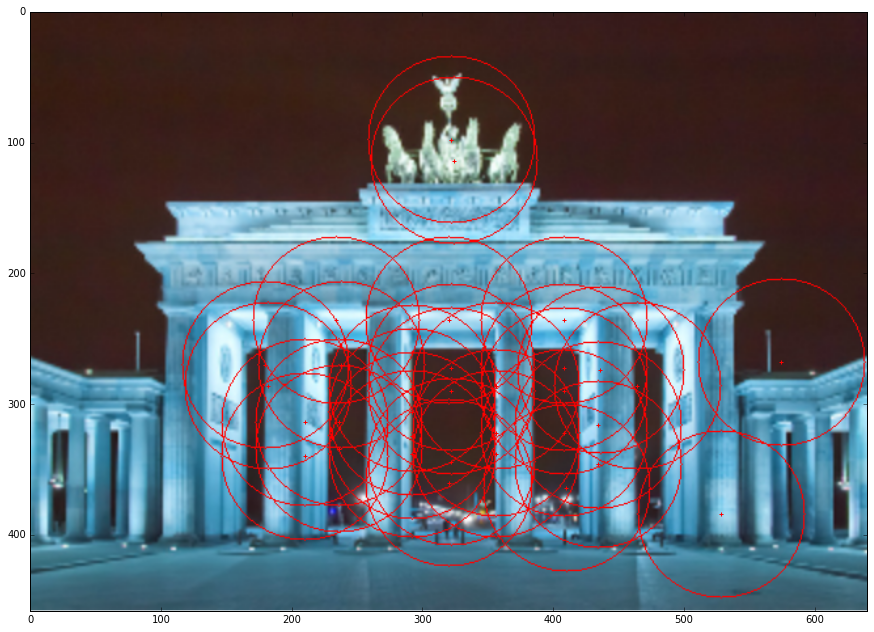

Feature count: 33


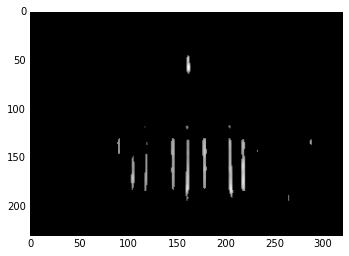

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0, 161,  49],
       [  1,   1,   1, ...,   0, 162,  57],
       [  0,   0,   0, ...,   0, 117, 118],
       ..., 
       [  0,   0,   0, ...,   1, 160, 180],
       [  1,   1,   1, ...,   1, 205, 182],
       [  1,   1,   1, ...,   0, 264, 192]])

In [39]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,32)

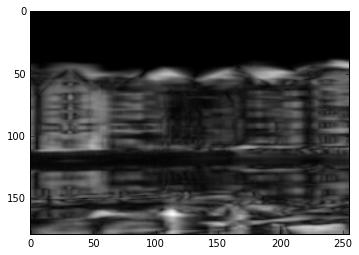

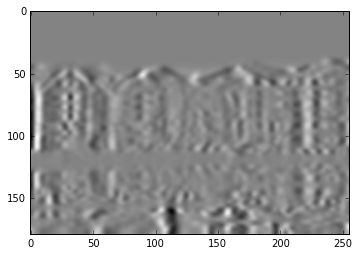

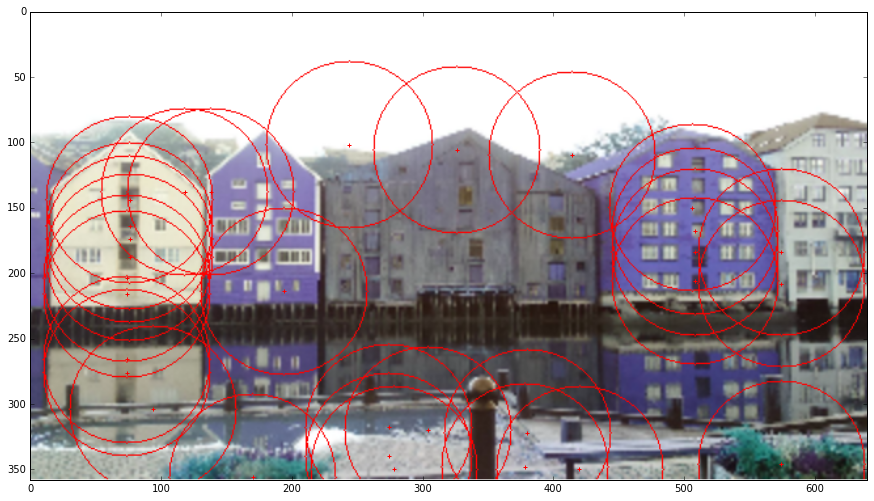

Feature count: 30


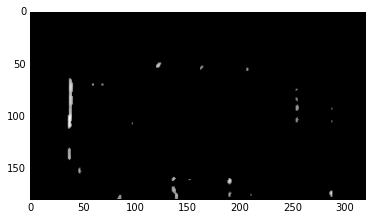

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0, 122,  51],
       [  0,   0,   0, ...,   1, 163,  53],
       [  1,   1,   1, ...,   1, 207,  55],
       ..., 
       [  1,   1,   1, ...,   0, 139, 175],
       [  1,   1,   1, ...,   1, 210, 175],
       [  0,   0,   0, ...,   0,  85, 178]])

In [40]:
bgr_image = cv2.imread('angle2.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,32)

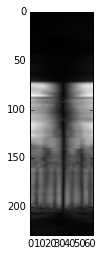

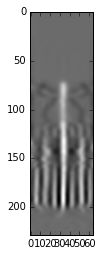

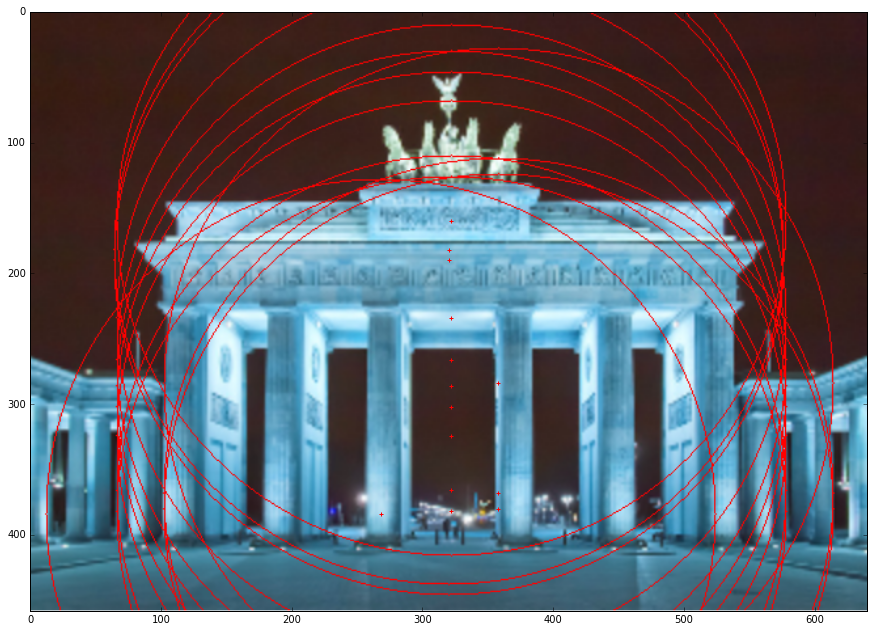

Feature count: 14


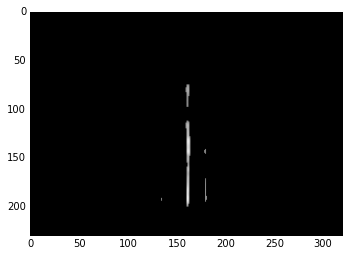

[array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161,  80]), array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,

-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [41]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
c = proceess_image(bgr_image,128)
print str(list(c))

In [42]:
bgr_image = cv2.imread('tor_700p.jpg')

bgr_image = preprocess_image(bgr_image)
proceess_image(bgr_image,256)

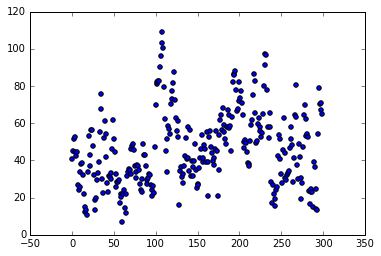

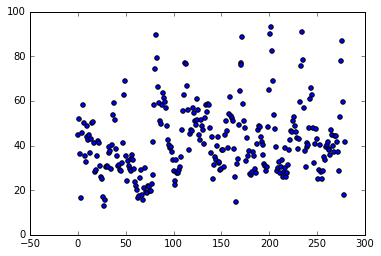

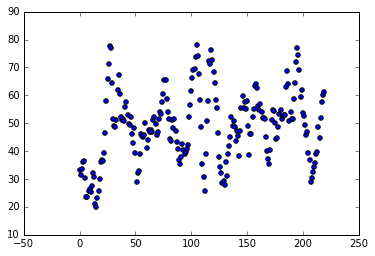

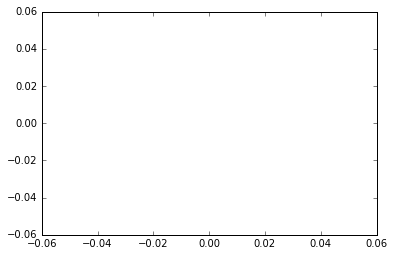

In [43]:

gray_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)
processed_image = gray_image.copy()
for x in [10,20,50,300]:
    results = scan_whole_line(processed_image,200,x)
    #plt.axis([0,len(results),0,np.max(results)*1.1])
    plt.scatter(range(len(results)),results)
    plt.show()

In [44]:
diff = np.ones((2,1))
diff *=diff
kernel = cv2.getGaussianKernel(len(diff),0)
print kernel
print np.sum(kernel * diff)#np.average(diff) 

[[ 0.5]
 [ 0.5]]
1.0


In [45]:
N=20
D=3000

sampleInput = cv2.getGaussianKernel(N*2,0)[:N].T*2*D
print sampleInput

left = list(sampleInput[0])#np.ones(N)*D
right = np.zeros(N)
diff = np.abs(left - right)
kernel = cv2.getGaussianKernel(len(diff)*2,0)[len(diff):]*2
print diff.shape
print kernel.shape
diff = diff.dot(kernel)
print diff

[[   3.38255069    5.41856494    8.46747118   12.90781246   19.19468732
    27.84446721   39.40272502   54.3930083    73.2469213    96.21995442
   123.30207743  154.13636614  187.96167803  223.59546269  259.46939222
   293.72354287  324.35519396  349.40766735  367.17531847  376.39513802]]
(20,)
(20, 1)
[ 43.63931937]


In [46]:
r = np.zeros(5)
r[1:4] = cv2.getGaussianKernel(3,0)[0]
print r
cv2.getGaussianKernel(5,0)[0] - r

[ 0.    0.25  0.25  0.25  0.  ]


array([ 0.0625, -0.1875, -0.1875, -0.1875,  0.0625])

In [47]:
print cv2.Sobel(1,1,3)

TypeError: Required argument 'dy' (pos 4) not found

In [ ]:
np.array([1,2,3]) * np.array([2,3,4])

IndexError: too many indices for array

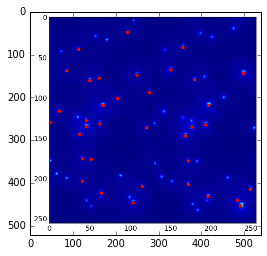

In [48]:
import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt

fname = '86XgT.png'
neighborhood_size = 5
threshold = 1500

data = scipy.misc.imread(fname)

data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))

plt.imshow(data)
plt.savefig('data.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(xy[:, 1], xy[:, 0], 'ro')
plt.savefig('result.png', bbox_inches = 'tight')

In [49]:
def get_features(path_to_image):
    print "Calculating for: "+path_to_image
    bgr_image = cv2.imread(path_to_image)

    bgr_image = preprocess_image(bgr_image)
    
    features_all = []
    #feature_map = {}
    i=3
    while True:
        features = proceess_image(bgr_image,np.power(2,i),verbose=False)
        #print features
        if features is None:
            break
        features_all +=list(features)
        
        #for key,value in feature_map_new.iteritems():
        #    if key in feature_map:
        #        feature_map[key] +=value
        #    else:
        #        feature_map[key] = value
        print "+"+str(features.shape[0])
        i+=1

    print "Feature count: "+str(len(features_all))
    return np.array(features_all)#, feature_map
get_features("tor_700p.jpg")

Calculating for: tor_700p.jpg
+49
+47
+33
+15
+14
Feature count: 158


-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[  1,   1,   1, ...,   0, 160,  30],
       [  0,   0,   0, ...,   1, 172,  30],
       [  0,   0,   0, ...,   0, 148,  34],
       ..., 
       [  0,   0,   0, ...,   0, 179, 190],
       [  1,   1,   1, ...,   0, 161, 191],
       [  0,   0,   1, ...,   0, 134, 192]])

In [50]:
train_image_paths = [
    #'notredame16/02.jpg',
    'angle.jpg',
    'angle2.jpg',
    'notredame16/01.jpg',
    'angle3.jpg',
    'notredame16/ne_notredame.jpg',
    'angle4.jpg',
    'angle5.jpg',
    'tor_700p.jpg'
]
test_image_paths = [
    #'notredame16/01.jpg',
    'notredame16/02.jpg',
    #'notredame16/ne_notredame.jpg',
    #'tor_700p.jpg'
]

In [51]:
def get_multi_local_symmetry_features(image_paths):
    X_list = []
    y_list = []
    
    feature_map = {}
    for index,image_path in enumerate(image_paths):
        ftrs = get_features(image_path)
        features = ftrs#unique_rows(ftrs,ftrs[:,:-2])
        print "Trim features to: " + str(features.shape[0])
        X_list += list(features)
        y_list += [index]*len(list(features))
        #for key,value in feature_map_new.iteritems():
        #    if key in feature_map:
        #        feature_map[key] +=value
        #    else:
        #        feature_map[key] = value

    gauss =  np.squeeze(cv2.getGaussianKernel(128*2,0)[128:]*2)
    X = np.array(X_list)
    positions = X[:,-2:]
    X = X[:,:-2]
    X = gauss*X
    y = np.array(y_list)

    return X,y, positions
X_train,y_train, positions = get_multi_local_symmetry_features(train_image_paths)


Calculating for: angle.jpg
+69
+13
+10
+9
+4
Feature count: 105
Trim features to: 105
Calculating for: angle2.jpg
+16
+21
+30
+21
+21
Feature count: 109
Trim features to: 109
Calculating for: notredame16/01.jpg
+55
+36
+22
+14
Feature count: 127
Trim features to: 127
Calculating for: angle3.jpg
+57
+30
+29
+17
+12
Feature count: 145
Trim features to: 145
Calculating for: notredame16/ne_notredame.jpg
+74
+63
+42
+53
+20
Feature count: 252
Trim features to: 252
Calculating for: angle4.jpg
+76
+56
+47
+26
+6
Feature count: 211
Trim features to: 211
Calculating for: angle5.jpg
+113
+58
+76
+34
+11
Feature count: 292
Trim features to: 292
Calculating for: tor_700p.jpg
+49
+47
+33
+15
+14
Feature count: 158
Trim features to: 158


-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [52]:
X_test,_,test_feature_map =  get_multi_local_symmetry_features(test_image_paths)
y_test = [0]*len(X_test)

Calculating for: notredame16/02.jpg
+62
+47
+28
+12
Feature count: 149
Trim features to: 149


-c:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
-c:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [56]:
#print X_train
#print X_test

from sklearn.neighbors import KNeighborsClassifier

NEIGHBOUR_COUNT = 100

#neigh = sklearn.neighbors.NearestNeighbors(n_neighbors=NEIGHBOUR_COUNT)
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=NEIGHBOUR_COUNT,weights='distance')
neigh.fit(X_train,y_train)

#print X_train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=100, p=2, weights='distance')

In [57]:

# test_bgr_image = cv2.imread(test_image_paths[0])

# test_bgr_image = preprocess_image(test_bgr_image)



# plt.imshow(test_bgr_image)

# y_pred = neigh.kneighbors(X_test,return_distance=False)

#print y_pred

In [58]:
from scipy.stats import mode

alpha = 1

y_pred = neigh.predict(X_test)
pred_odds = neigh.predict_proba(X_test)
log_likelihood = np.log((pred_odds*NEIGHBOUR_COUNT + alpha) /(NEIGHBOUR_COUNT + 2*alpha))

ll = np.sum(log_likelihood,axis=0) #+ np.log([232.0/(232+301),301.0/(232+301)])*301
print ll

print train_image_paths[np.argmax(ll)]
print train_image_paths[int(scipy.stats.mstats.mode(y_pred)[0][0])]
print sklearn.metrics.accuracy_score(y_test, y_pred)


#perfektno fulava =)





[-460.28241542 -484.80019523 -385.51959127 -359.881045   -362.30788236
 -314.48630516 -305.252391   -380.19492394]
angle5.jpg
angle5.jpg
0.0268456375839


In [ ]:
#indices = np.argsort(X_train)
print X_train.shape,y_train[:,np.newaxis].shape
Xy = np.hstack((X_train,y_train[:,np.newaxis]))


#print np.sort(Xy,order=np.ones(1))
##print []

c = np.array([[11,23,31],[11,23,11]])

# def unique_rows(a):
#     order = np.lexsort(a.T)
#     a = a[order]
#     diff = np.diff(a, axis=0)
#     ui = np.ones(len(a), 'bool')
#     ui[1:] = (diff != 0).any(axis=1) 
#     return a[ui]


#print c
#print np.sort(c,axis=0)
order = np.lexsort(X_train.T)
print order.shape

Xy = np.hstack((X_train[order],y_train[:,np.newaxis][order]))
diff = np.diff(Xy[:,:-1], axis=0)
ui = np.ones(len(Xy), 'bool')


ui[1:] = (diff != 0).any(axis=1)
for i in xrange(2):
    ui = np.logical_or(ui,np.roll(ui,1))
Xy_tweaked = Xy[ui]
print Xy
s
for row in unique_rows(X_train[y_train==1]):
    print ''.join(map(lambda x:str(x),list(row)))


In [ ]:

#for row in X_train[y_train==0]:
#    print ''.join(map(lambda x:str(x),list(row)))

In [ ]:
#for row in X_train[y_train==1]:
#    print ''.join(map(lambda x:str(x),list(row)))

order = np.lexsort(X_train.T)
aa = X_train[order]
diff = np.diff(aa,axis=0)
ui = np.ones(len(X_train), 'bool')
print aa.shape
print diff.shape
ui[1:] = (diff != 0).any(axis=1)
aa = aa[ui]
for row,idx,d in zip(X_train,y_train,ui):
    print ''.join(map(lambda x:str(x),list(row))) + " "+ str(idx)+str(d)
